In [100]:
from Modele import Modele
from Optimiseur import Optimiseur
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0 instead.

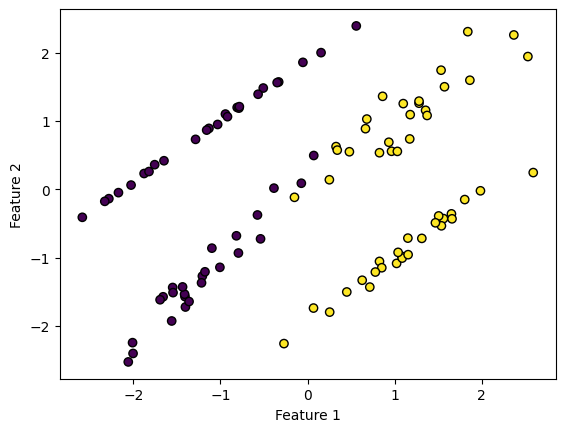

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.show()

In [102]:
def create_modele(Lambda,gamma,X_train):
    modele = Modele(Lambda,gamma)
    optimiseur = Optimiseur(modele)
    L,mu = modele.constante_L(X_train)
    init= np.random.randn(X_train.shape[0]) 
    return modele, optimiseur, L, mu, init

In [103]:
modele, optimiseur, L, mu, init = create_modele(0,30,X_train)

In [126]:
def figure(stepsizes,L,train_loss,norm,name1,name2,GD=False):
    if not GD:
        # Plot the stepsizes
        stepsizes = np.array(stepsizes)
        plt.figure()
        plt.plot(stepsizes * L, label='Stepsizes')
        plt.hlines(y=2, xmin=0, xmax=len(stepsizes), colors='r', linestyles='dashed', label='2')
        plt.xlabel('Iteration', fontsize=14)
        plt.ylabel('Stepsize * L', fontsize=14)
        plt.title('Stepsizes over Iterations', fontsize=16)
        plt.grid()
        plt.savefig(name1)
        plt.show()
        

    # Plot train loss on the first subplot
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(train_loss, label='Train Loss', color='blue')
    axs[0].set_xlabel('Iteration', fontsize=14)
    axs[0].set_ylabel('Train Loss', fontsize=14)
    axs[0].set_title('Train Loss over Iterations', fontsize=16)
    axs[0].grid()

    # Plot norm on the second subplot
    axs[1].plot(norm, label='Norm', color='orange')
    axs[1].set_xlabel('Iteration', fontsize=14)
    axs[1].set_ylabel('Norm of the Gradient', fontsize=14)
    axs[1].set_title('Norm of the Gradient over Iterations', fontsize=16)
    axs[1].grid()

    plt.tight_layout()
    plt.savefig(name2)
    plt.show()
    

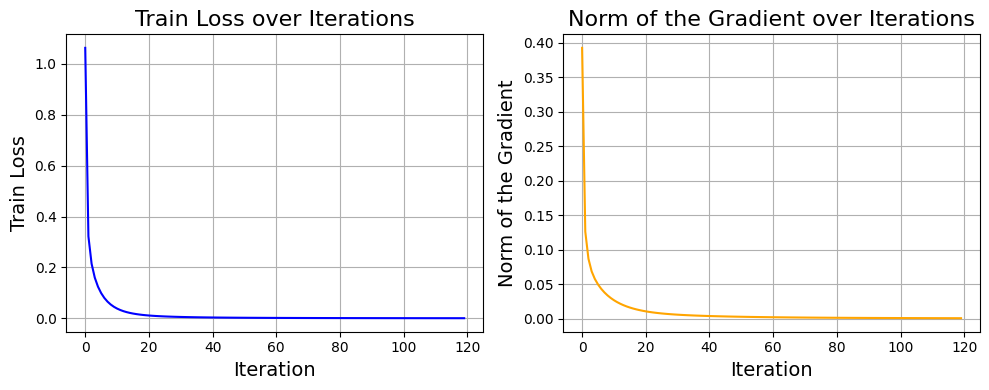

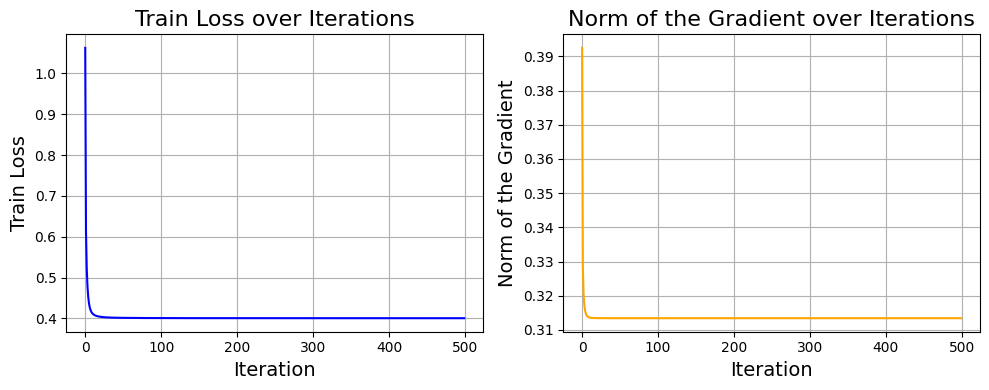

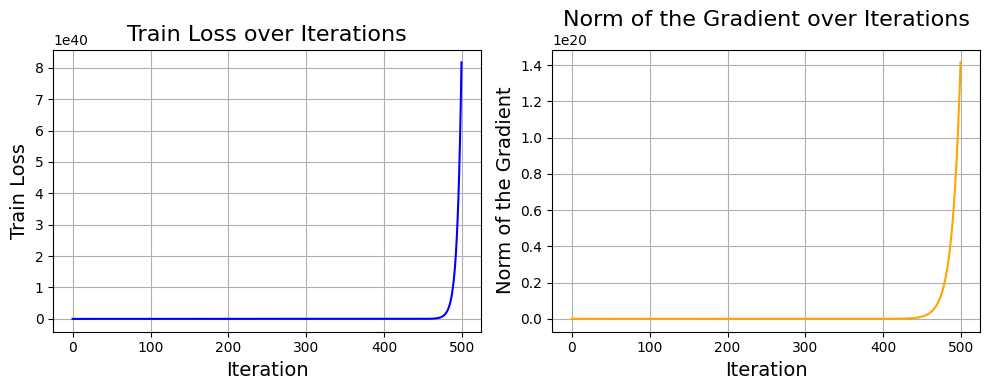

In [127]:
alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(),1/L, 500, 0.001, "norm")
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(None,L,train_loss,norm,None,"GD_train_1.pdf",True)

alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(),2/L, 500, 0.001, "norm")
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(None,L,train_loss,norm,None,"GD_train_2.pdf",True)

alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(),2.1/L, 500, 0.001, "norm")
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(None,L,train_loss,norm,None,"GD_train_21.pdf",True)

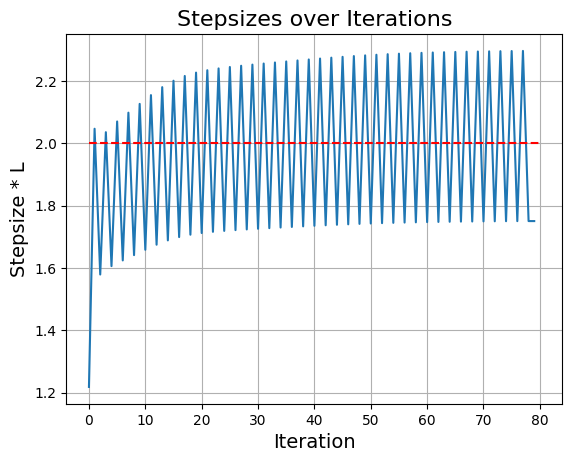

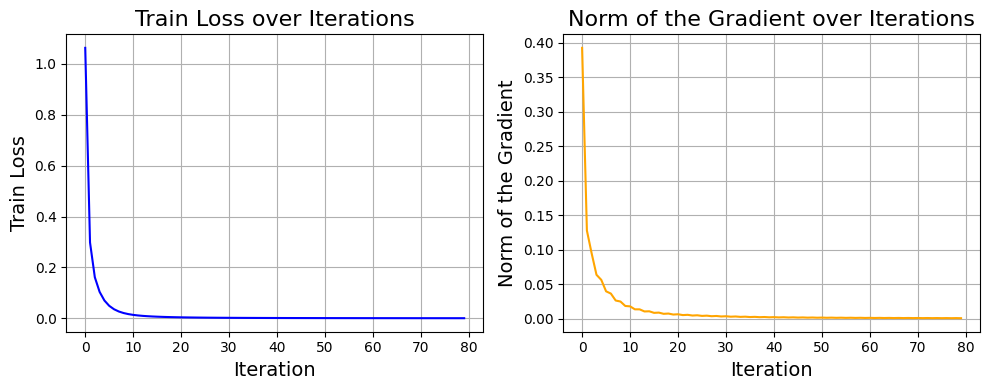

In [128]:
alpha, alpha_list,stepsizes = optimiseur.optimal_stepsize(X_train, y_train, init.copy(), 1000, 0.001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"optimal_stepsize.pdf","optimal_train.pdf")

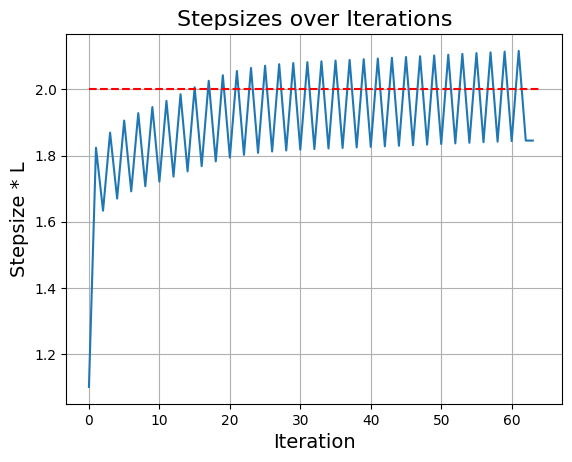

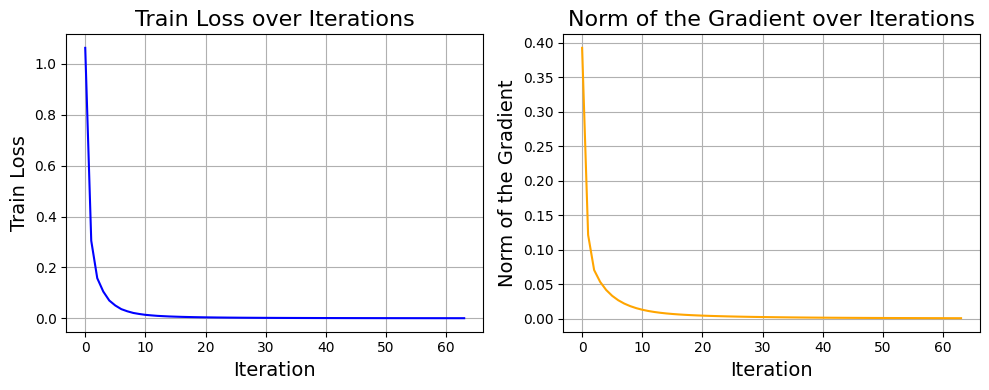

In [129]:
alpha, alpha_list,stepsizes = optimiseur.exact_stepsize(X_train, y_train, init.copy(), 1000, 0.001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"exact_stepsize.pdf","exact_train.pdf")

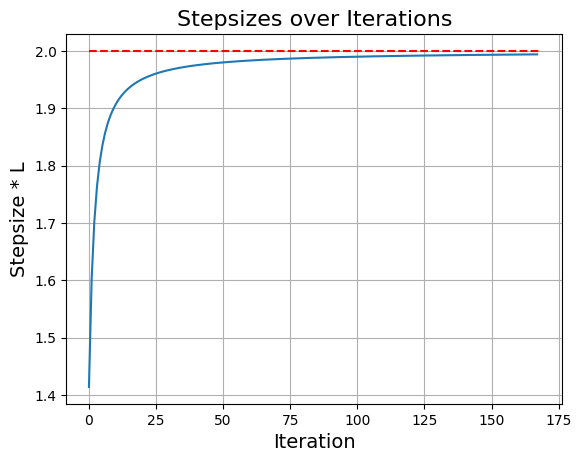

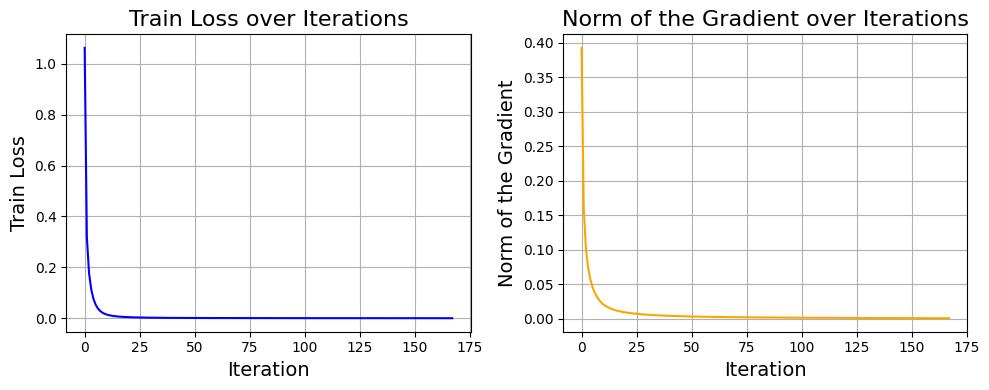

In [130]:
alpha, alpha_list,stepsizes = optimiseur.dynamic_stepsize(X_train, y_train, init.copy(), 1000, 0.001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"dynamic_stepsize.pdf","dynamic_train.pdf")

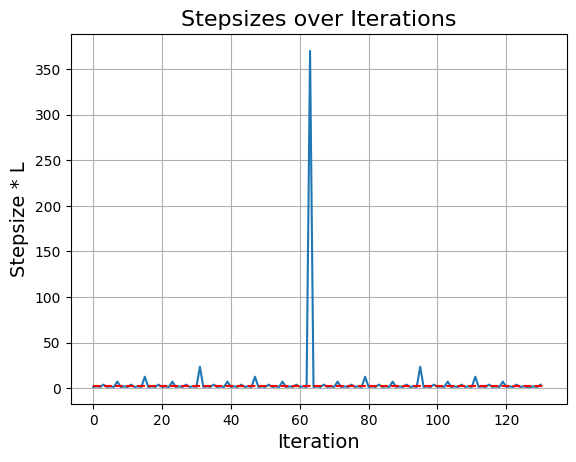

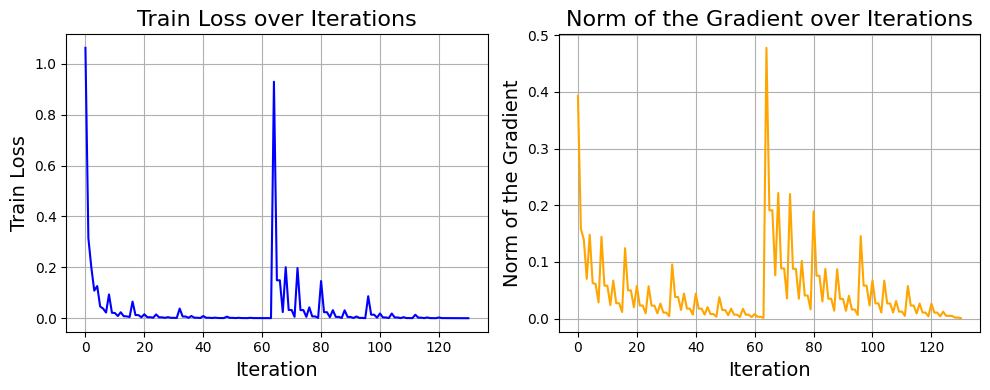

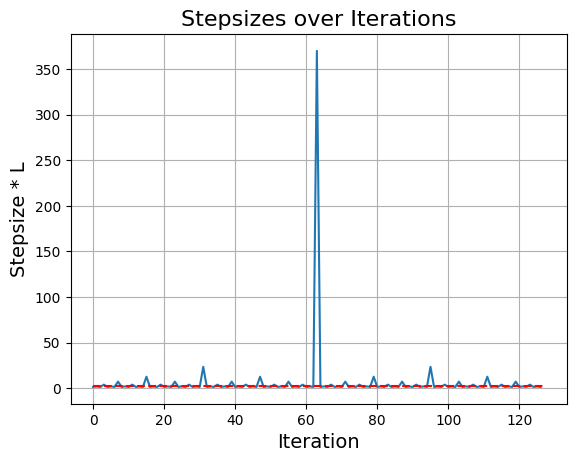

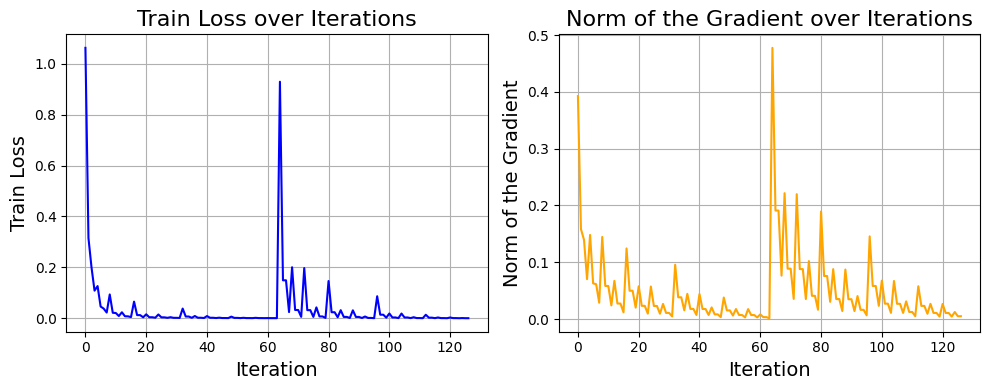

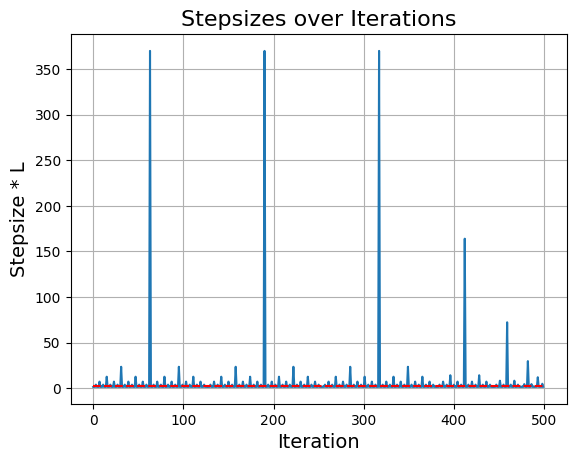

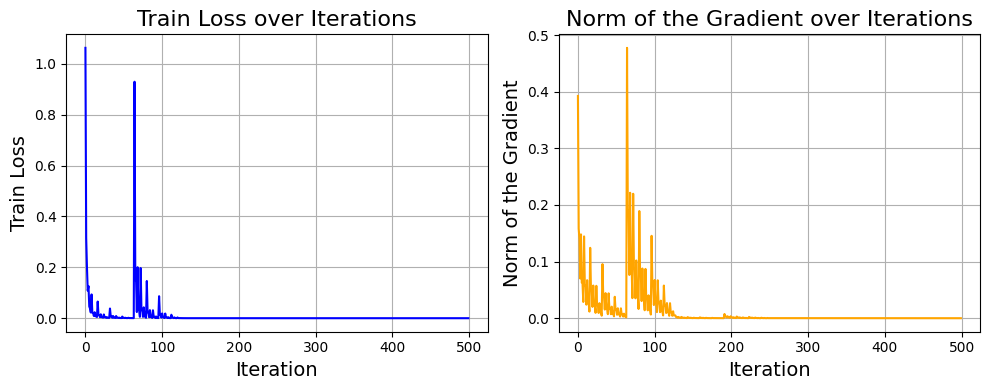

In [134]:
alpha, alpha_list,stepsizes = optimiseur.Periodic(X_train, y_train, init.copy(), 1000, 0.001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"periodic_stepsize.pdf","periodic_train.pdf")

alpha, alpha_list,stepsizes = optimiseur.Periodic(X_train, y_train, init.copy(), 127, 0.000001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"periodic_stepsize_127.pdf","periodic_train_127.pdf")

alpha, alpha_list,stepsizes = optimiseur.Periodic(X_train, y_train, init.copy(), 500, 0.000001, "norm",True)
train_loss, test_loss, norm, train_accuracy, test_accuracy = modele.compute_all(X_train,X_test, y_train, y_test, alpha_list)
figure(stepsizes,L,train_loss,norm,"periodic_stepsize_500.pdf","periodic_train_500.pdf")